In [4]:
# Install MLflow
!pip install mlflow

# **Github Links:**
Ameer Espanioly - 213471618: https://github.com/Ameer618/Machine_Learning_Ex3

Baraa Shaqir - 213971294: https://github.com/Baraash2003/Machine_Learning_Ex3

Deema Shaqir - 314947623: https://github.com/deemashaqir/Machine_Learning_Ex3




Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

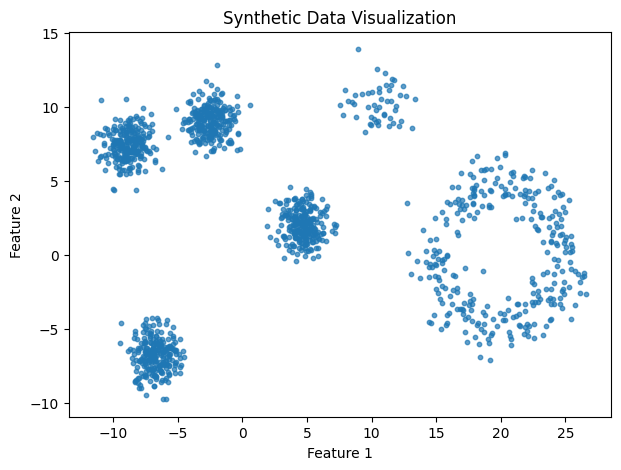

In [2]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
plt.title("Synthetic Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import mlflow
import mlflow.sklearn

mlflow.set_experiment("ex3_clustering")

kmeans_runs = []
best_kmeans = None
best_kmeans_sil = -1
best_k = None

k_values = list(range(2, 11))

for k in k_values:
    for init in ["k-means++", "random"]:
        for n_init in [10, 20]:
            with mlflow.start_run(run_name=f"kmeans_k={k}_init={init}_ninit={n_init}"):
                model = KMeans(
                    n_clusters=k,
                    init=init,
                    n_init=n_init,
                    random_state=42
                )
                labels = model.fit_predict(X)

                sil = silhouette_score(X, labels)
                dbi = davies_bouldin_score(X, labels)
                chi = calinski_harabasz_score(X, labels)

                mlflow.log_param("method", "kmeans")
                mlflow.log_param("k", k)
                mlflow.log_param("init", init)
                mlflow.log_param("n_init", n_init)

                mlflow.log_metric("silhouette", sil)
                mlflow.log_metric("davies_bouldin", dbi)
                mlflow.log_metric("calinski_harabasz", chi)

                mlflow.sklearn.log_model(model, artifact_path="model")

                kmeans_runs.append({
                    "method": "kmeans",
                    "k": k,
                    "init": init,
                    "n_init": n_init,
                    "silhouette": sil,
                    "davies_bouldin": dbi,
                    "calinski_harabasz": chi
                })

                if sil > best_kmeans_sil:
                    best_kmeans_sil = sil
                    best_kmeans = model
                    best_k = k

kmeans_df = pd.DataFrame(kmeans_runs).sort_values("silhouette", ascending=False)
kmeans_df.head(10)

2026/02/01 19:03:42 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/01 19:03:42 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/01 19:03:42 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/01 19:03:42 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/01 19:03:42 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/01 19:03:42 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/01 19:03:42 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/01 19:03:42 INFO mlflow.store.db.utils: Updating database tables
2026/02/01 19:03:42 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/01 19:03:42 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/01 19:03:42 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/02/01 19:0

,method,k,init,n_init,silhouette,davies_bouldin,calinski_harabasz
19,kmeans,6,random,20,0.725118,0.388403,5499.239421
18,kmeans,6,random,10,0.725118,0.388403,5499.239421
17,kmeans,6,k-means++,20,0.725118,0.388403,5499.239421
16,kmeans,6,k-means++,10,0.725118,0.388403,5499.239421
29,kmeans,9,k-means++,20,0.716087,0.470167,9393.623039
28,kmeans,9,k-means++,10,0.716057,0.469870,9392.121867
24,kmeans,8,k-means++,10,0.716012,0.470934,8749.051467
25,kmeans,8,k-means++,20,0.716012,0.470934,8749.051467
32,kmeans,10,k-means++,10,0.712558,0.486104,9519.912924
33,kmeans,10,k-means++,20,0.711564,0.494104,9522.897875


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [5]:
from sklearn.cluster import AgglomerativeClustering

agglo_runs = []
best_agglo = None
best_agglo_sil = -1
best_agglo_k = None
best_agglo_linkage = None

k_values = list(range(2, 11))
linkages = ["ward", "complete", "average", "single"]

for k in k_values:
    for linkage in linkages:

        if linkage == "ward":
            metric = "euclidean"
        else:
            metric = "euclidean"

        with mlflow.start_run(run_name=f"agglo_k={k}_linkage={linkage}"):
            model = AgglomerativeClustering(
                n_clusters=k,
                linkage=linkage,
                metric=metric
            )
            labels = model.fit_predict(X)

            sil = silhouette_score(X, labels)
            dbi = davies_bouldin_score(X, labels)
            chi = calinski_harabasz_score(X, labels)

            mlflow.log_param("method", "agglomerative")
            mlflow.log_param("k", k)
            mlflow.log_param("linkage", linkage)
            mlflow.log_param("metric", metric)

            mlflow.log_metric("silhouette", sil)
            mlflow.log_metric("davies_bouldin", dbi)
            mlflow.log_metric("calinski_harabasz", chi)

            agglo_runs.append({
                "method": "agglomerative",
                "k": k,
                "linkage": linkage,
                "metric": metric,
                "silhouette": sil,
                "davies_bouldin": dbi,
                "calinski_harabasz": chi
            })

            if sil > best_agglo_sil:
                best_agglo_sil = sil
                best_agglo = model
                best_agglo_k = k
                best_agglo_linkage = linkage

agglo_df = pd.DataFrame(agglo_runs).sort_values("silhouette", ascending=False)
agglo_df.head(10)

,method,k,linkage,metric,silhouette,davies_bouldin,calinski_harabasz
16,agglomerative,6,ward,euclidean,0.725690,0.385531,5488.001181
26,agglomerative,8,average,euclidean,0.709939,0.482752,8308.423340
30,agglomerative,9,average,euclidean,0.709345,0.479285,9003.916039
28,agglomerative,9,ward,euclidean,0.708819,0.478370,9091.195021
32,agglomerative,10,ward,euclidean,0.708817,0.496411,9218.116710
24,agglomerative,8,ward,euclidean,0.708576,0.486675,8203.061065
33,agglomerative,10,complete,euclidean,0.707839,0.498271,9342.622069
34,agglomerative,10,average,euclidean,0.707310,0.493844,9247.082514
29,agglomerative,9,complete,euclidean,0.704602,0.483297,8785.806682
25,agglomerative,8,complete,euclidean,0.701877,0.497487,7907.407578


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [6]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan_runs = []
best_dbscan = None
best_dbscan_sil = -1
best_dbscan_params = None

# Grid בסיסי (אפשר להרחיב)
eps_values = np.linspace(0.2, 1.8, 9)
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for ms in min_samples_values:
        with mlflow.start_run(run_name=f"dbscan_eps={eps:.2f}_ms={ms}"):
            model = DBSCAN(eps=float(eps), min_samples=int(ms))
            labels = model.fit_predict(X)

            # מספר אשכולות (לא כולל רעש -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            noise_ratio = float(np.mean(labels == -1))


            if n_clusters >= 2:
                sil = silhouette_score(X, labels)
                dbi = davies_bouldin_score(X, labels)
                chi = calinski_harabasz_score(X, labels)
            else:
                sil, dbi, chi = np.nan, np.nan, np.nan

            mlflow.log_param("method", "dbscan")
            mlflow.log_param("eps", float(eps))
            mlflow.log_param("min_samples", int(ms))

            mlflow.log_param("n_clusters", int(n_clusters))
            mlflow.log_metric("noise_ratio", noise_ratio)

            if not np.isnan(sil):
                mlflow.log_metric("silhouette", float(sil))
                mlflow.log_metric("davies_bouldin", float(dbi))
                mlflow.log_metric("calinski_harabasz", float(chi))

            dbscan_runs.append({
                "method": "dbscan",
                "eps": float(eps),
                "min_samples": int(ms),
                "n_clusters": int(n_clusters),
                "noise_ratio": noise_ratio,
                "silhouette": sil,
                "davies_bouldin": dbi,
                "calinski_harabasz": chi
            })


            if not np.isnan(sil) and sil > best_dbscan_sil and noise_ratio < 0.6:
                best_dbscan_sil = sil
                best_dbscan = model
                best_dbscan_params = (float(eps), int(ms))

dbscan_df = pd.DataFrame(dbscan_runs).sort_values("silhouette", ascending=False)
dbscan_df.head(10)

,method,eps,min_samples,n_clusters,noise_ratio,silhouette,davies_bouldin,calinski_harabasz
20,dbscan,1.4,10,6,0.003704,0.721339,1.611802,4316.321989
16,dbscan,1.2,5,6,0.006667,0.718538,1.956999,4070.292322
15,dbscan,1.2,3,6,0.006667,0.718538,1.956999,4070.292322
17,dbscan,1.2,10,6,0.012593,0.714264,2.218792,3751.791490
12,dbscan,1.0,3,6,0.010370,0.713499,1.722215,3611.802141
13,dbscan,1.0,5,6,0.016296,0.707012,12.489438,3185.378450
21,dbscan,1.6,3,5,0.002222,0.689402,1.357377,3392.855821
22,dbscan,1.6,5,5,0.002222,0.689402,1.357377,3392.855821
18,dbscan,1.4,3,5,0.002963,0.688824,1.802245,3335.246830
19,dbscan,1.4,5,5,0.002963,0.688824,1.802245,3335.246830


6. Compare the results and choose the best method for the data


In [7]:
from sklearn.decomposition import PCA

# מאחדים את כל הניסויים לטבלה אחת (לאקסל)
all_runs_df = pd.concat(
    [kmeans_df, agglo_df, dbscan_df],
    ignore_index=True,
    sort=False
)
excel_path = "ex3_experiments.xlsx"
all_runs_df.to_excel(excel_path, index=False)
excel_path


'ex3_experiments.xlsx'

## Conclusion

We conducted over 90 experiments using KMeans, Agglomerative Clustering, and DBSCAN
with different hyperparameters.

The best performance was achieved using KMeans with k=6, which obtained a silhouette
score of approximately 0.72.

Agglomerative clustering with ward linkage achieved similar performance.

DBSCAN performed well for some parameter settings, but was less stable and more sensitive
to hyperparameters.

Overall, KMeans provided the most consistent and reliable clustering results
for this dataset.
